In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time
import psutil
from sklearn.model_selection import train_test_split,RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.neural_network import MLPClassifier
df_train = pd.read_csv('/kaggle/input/iot-device-identification/iot_device_train.csv')
df_test = pd.read_csv('/kaggle/input/iot-device-identification/iot_device_test.csv')
df_train.head()

,ack,ack_A,ack_B,bytes,bytes_A,bytes_A_B_ratio,bytes_B,ds_field_A,ds_field_B,duration,...,suffix_is_co.il,suffix_is_com,suffix_is_com.sg,suffix_is_else,suffix_is_empty_char_value,suffix_is_googleapis.com,suffix_is_net,suffix_is_org,suffix_is_unresolved,device_category
0,9,5,5,1213,743,0.713924,668,0,0,1.5756,...,0,0,0,1,0,0,0,0,0,security_camera
1,9,5,5,1213,743,1.806874,668,0,0,0.6890,...,0,0,0,1,0,0,0,0,0,security_camera
2,9,5,5,1213,743,0.103124,668,0,0,0.9852,...,0,0,0,1,0,0,0,0,0,security_camera
3,9,5,5,1213,743,1.806874,668,0,0,1.5756,...,0,0,0,1,0,0,0,0,0,security_camera
4,9,5,5,1213,743,1.806874,668,0,0,1.5756,...,0,0,0,1,0,0,0,0,0,security_camera


In [2]:
df = pd.concat([df_train, df_test], ignore_index=True)
# 模型建模
X = df.drop('device_category', axis=1)
y = df['device_category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [3]:
# Merge train and test data
df = pd.concat([df_train, df_test], ignore_index=True)
# Drop columns with unique values
to_remove = [col for col in df.columns if len(df[col].unique()) == 1]
df = df.drop(to_remove, axis=1)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


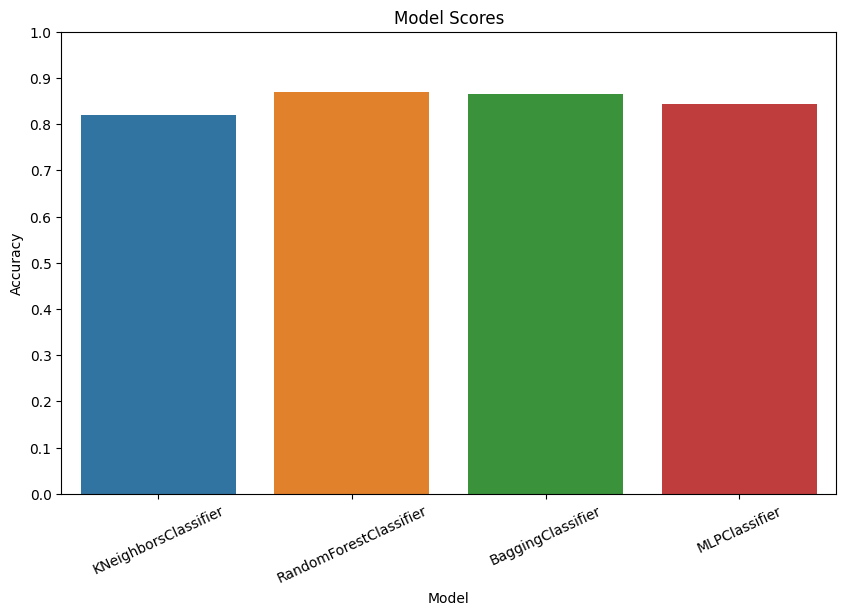

Mode: KNeighborsClassifier
                 precision    recall  f1-score   support

             TV       0.83      0.85      0.84        46
   baby_monitor       0.84      1.00      0.91        37
         lights       0.45      0.61      0.52        41
  motion_sensor       0.96      0.96      0.96        48
security_camera       1.00      0.98      0.99        47
 smoke_detector       1.00      0.98      0.99        58
         socket       0.40      0.39      0.40        49
     thermostat       0.98      0.97      0.98        62
          watch       0.94      0.86      0.90        58
   water_sensor       0.65      0.38      0.48        29

       accuracy                           0.82       475
      macro avg       0.81      0.80      0.80       475
   weighted avg       0.83      0.82      0.82       475



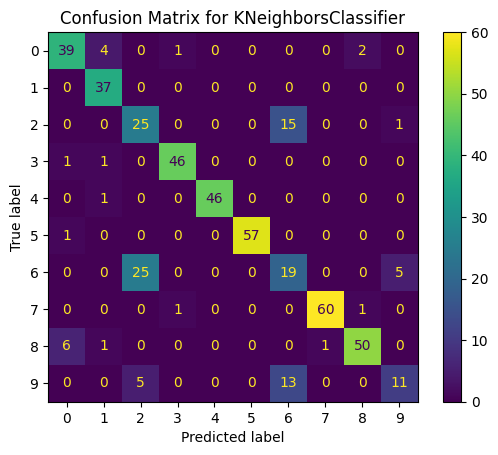

Mode: RandomForestClassifier
                 precision    recall  f1-score   support

             TV       0.88      0.96      0.92        46
   baby_monitor       0.95      1.00      0.97        37
         lights       0.53      0.73      0.61        41
  motion_sensor       0.94      0.98      0.96        48
security_camera       1.00      1.00      1.00        47
 smoke_detector       1.00      0.98      0.99        58
         socket       0.59      0.47      0.52        49
     thermostat       0.98      0.97      0.98        62
          watch       1.00      0.91      0.95        58
   water_sensor       0.68      0.52      0.59        29

       accuracy                           0.87       475
      macro avg       0.86      0.85      0.85       475
   weighted avg       0.87      0.87      0.87       475



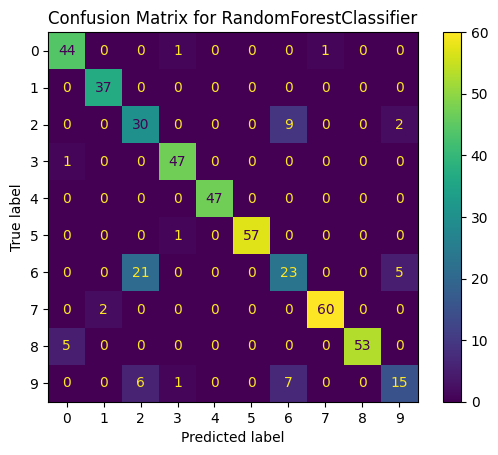

Mode: BaggingClassifier
                 precision    recall  f1-score   support

             TV       0.85      0.96      0.90        46
   baby_monitor       1.00      0.97      0.99        37
         lights       0.51      0.63      0.57        41
  motion_sensor       0.96      0.96      0.96        48
security_camera       1.00      1.00      1.00        47
 smoke_detector       1.00      1.00      1.00        58
         socket       0.57      0.51      0.54        49
     thermostat       0.97      0.97      0.97        62
          watch       0.98      0.93      0.96        58
   water_sensor       0.68      0.52      0.59        29

       accuracy                           0.87       475
      macro avg       0.85      0.84      0.85       475
   weighted avg       0.87      0.87      0.86       475



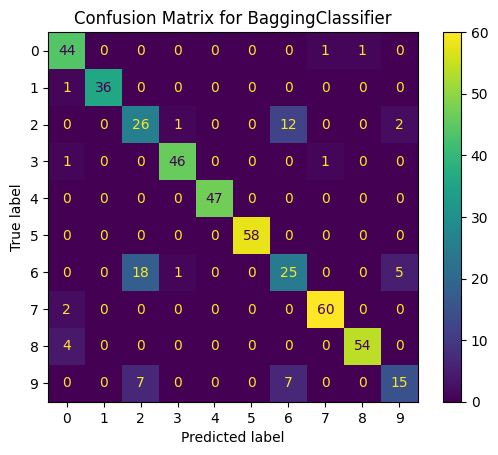

Mode: MLPClassifier
                 precision    recall  f1-score   support

             TV       0.91      0.89      0.90        46
   baby_monitor       0.97      0.97      0.97        37
         lights       0.43      0.95      0.59        41
  motion_sensor       0.96      0.94      0.95        48
security_camera       0.92      1.00      0.96        47
 smoke_detector       1.00      0.98      0.99        58
         socket       0.67      0.24      0.36        49
     thermostat       1.00      0.98      0.99        62
          watch       0.93      0.93      0.93        58
   water_sensor       0.90      0.31      0.46        29

       accuracy                           0.84       475
      macro avg       0.87      0.82      0.81       475
   weighted avg       0.88      0.84      0.83       475



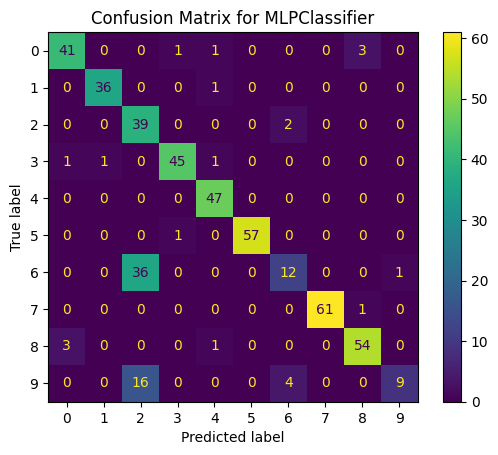

In [4]:
# Split features and target variable
X = df.drop('device_category', axis=1)
y = df['device_category']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model fitting and scoring
models = {
    'KNeighborsClassifier': KNeighborsClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'BaggingClassifier': BaggingClassifier(),
     'MLPClassifier': MLPClassifier(
        hidden_layer_sizes=(100, 100),  # 调整为更复杂的网络结构
        activation='tanh',              # 使用另一种激活函数
        solver='adam',                  
        alpha=0.0001,                   
        learning_rate='adaptive',       
        learning_rate_init=0.001,       
        max_iter=1000,                  # 增加迭代次数以促进收敛
        early_stopping=True,            # 启用早停
        random_state=42)
}

model_scores = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    score = model.score(X_test_scaled, y_test)
    model_scores[name] = score

# Plot model scores
plt.figure(figsize=(10, 6))
sns.barplot(x=list(model_scores.keys()), y=list(model_scores.values()))
plt.title('Model Scores')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=25)
plt.yticks(np.arange(0, 1.01, 0.1))
plt.show()

# Model evaluation
for name, model in models.items():
    print(f"Mode: {name}")
    y_pred = model.predict(X_test_scaled)
    print(classification_report(y_test, y_pred))
    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Initialize the ConfusionMatrixDisplay instance with the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    
    # Plot the confusion matrix
    disp.plot()
    plt.title(f'Confusion Matrix for {name}')
    plt.show()


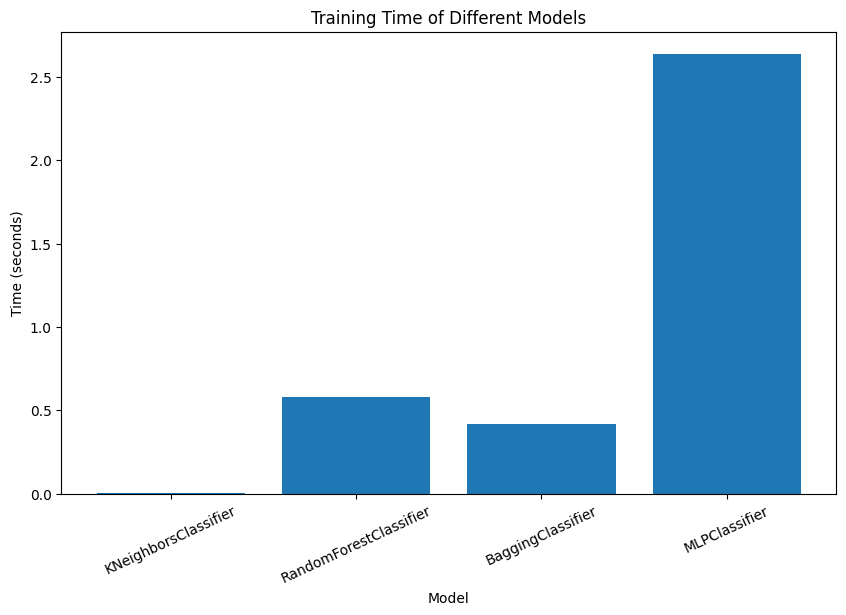

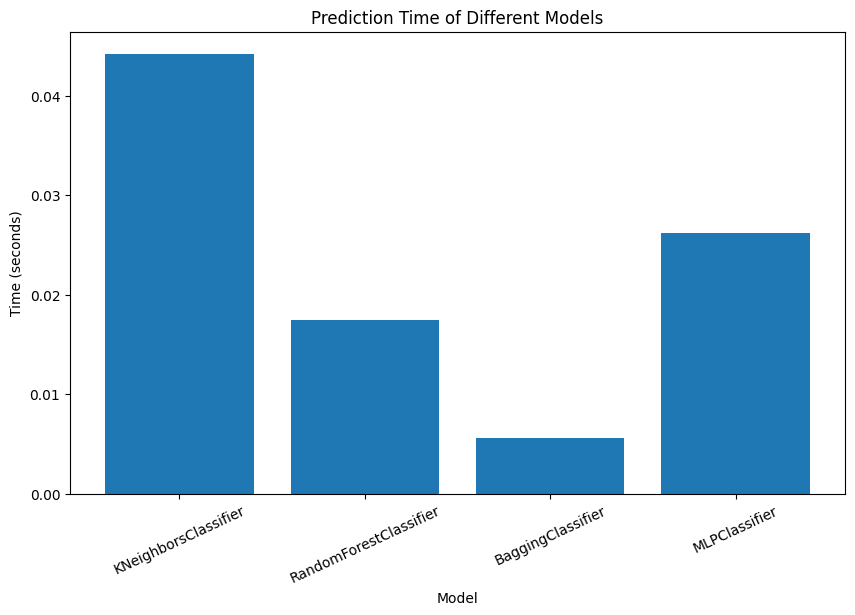

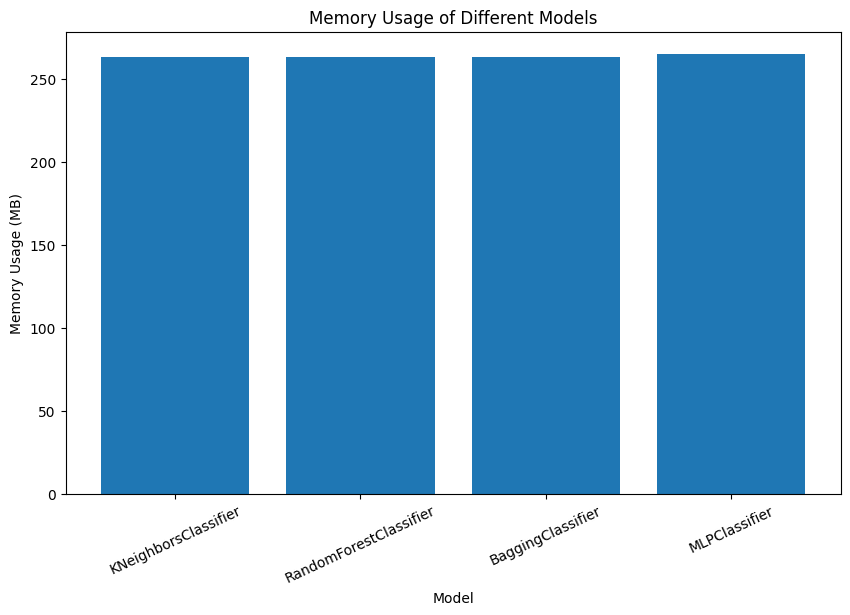

In [5]:
def calculate_model_cost(classifier, X_train, X_test):
    start_time = time.time()
    classifier.fit(X_train, y_train)
    train_time = time.time() - start_time

    start_time = time.time()
    classifier.predict(X_test)
    predict_time = time.time() - start_time

    process = psutil.Process(os.getpid())
    memory_usage = process.memory_info().rss / 1024 / 1024

    return train_time, predict_time, memory_usage

cost_results = {}
for name, classifier in models.items():
    train_time, predict_time, memory_usage = calculate_model_cost(classifier, X_train_scaled, X_test_scaled)
    cost_results[name] = {
        'train_time': train_time,
        'predict_time': predict_time,
        'memory_usage': memory_usage
    }

cost_df = pd.DataFrame(cost_results).transpose()

# Plot training time
plt.figure(figsize=(10, 6))
plt.bar(cost_df.index, cost_df['train_time'])
plt.title('Training Time of Different Models')
plt.xlabel('Model')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=25)
plt.show()

# Plot prediction time
plt.figure(figsize=(10, 6))
plt.bar(cost_df.index, cost_df['predict_time'])
plt.title('Prediction Time of Different Models')
plt.xlabel('Model')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=25)
plt.show()

# Plot memory usage
plt.figure(figsize=(10, 6))
plt.bar(cost_df.index, cost_df['memory_usage'])
plt.title('Memory Usage of Different Models')
plt.xlabel('Model')
plt.ylabel('Memory Usage (MB)')
plt.xticks(rotation=25)
plt.show()

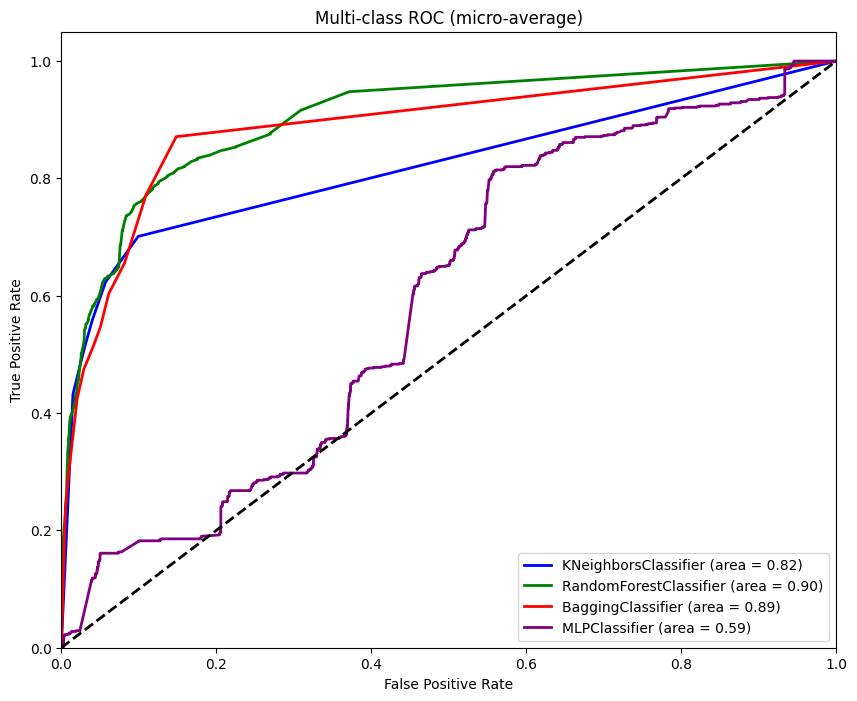

In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import numpy as np  # 确保导入了numpy


# 提取特征和标签
X_train = df_train.drop('device_category', axis=1)
y_train = df_train['device_category']
X_test = df_test.drop('device_category', axis=1)
y_test = df_test['device_category']

# 确定所有数据集中出现的类别
all_classes = np.unique(pd.concat([y_train, y_test]))

# 将标签二值化，适用于多类别ROC分析
y_train_bin = label_binarize(y_train, classes=all_classes)
y_test_bin = label_binarize(y_test, classes=all_classes)
n_classes = y_train_bin.shape[1]

# 标准化特征
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 模型定义，包括调整后的MLPClassifier参数
models = {
    'KNeighborsClassifier': OneVsRestClassifier(KNeighborsClassifier()),
    'RandomForestClassifier': OneVsRestClassifier(RandomForestClassifier()),
    'BaggingClassifier': OneVsRestClassifier(BaggingClassifier()),
    'MLPClassifier': OneVsRestClassifier(make_pipeline(StandardScaler(), MLPClassifier(
        hidden_layer_sizes=(100, 100),  # 调整为更复杂的网络结构
        activation='tanh',              # 使用另一种激活函数
        solver='adam',                  
        alpha=0.0001,                   
        learning_rate='adaptive',       
        learning_rate_init=0.001,       
        max_iter=1000,                  # 增加迭代次数以促进收敛
        early_stopping=True,            # 启用早停
        random_state=42)))
}

# 绘制ROC曲线
plt.figure(figsize=(10, 8))
colors = ['blue', 'green', 'red', 'purple']
for (name, model), color in zip(models.items(), colors):
    model.fit(X_train_scaled, y_train_bin)  # 训练模型
    y_score = model.predict_proba(X_test_scaled)  # 预测概率

    # 计算微观平均ROC曲线和AUC
    fpr, tpr, roc_auc = {}, {}, {}
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # 绘制微观平均ROC曲线
    plt.plot(fpr["micro"], tpr["micro"], label=f'{name} (area = {roc_auc["micro"]:.2f})', color=color, linestyle='-', linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC (micro-average)')
plt.legend(loc="lower right")
plt.show()